<h1>Given:</h1>
<p>The circuit diagram below with a driven voltage $V_t = 5.20V$ and resistor values in the table below</p>

In [1]:
import ipywidgets as widgets
from ipywidgets import Button, Layout, jslink, IntText, IntSlider
from ipywidgets import interact, interactive, fixed, interact_manual

from IPython.display import display

from ipysheet import cell, sheet, row, column, cell_range

import schemdraw as schem
import schemdraw.elements as e

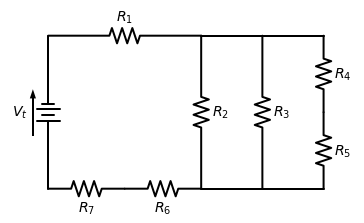

In [2]:
d = schem.Drawing(unit=2.5)
R7 = d.add(e.RES, d='right', botlabel='$R_7$')
R6 = d.add(e.RES, d='right', botlabel='$R_6$')
d.add(e.LINE, d='right', l=2)
d.add(e.LINE, d='right', l=2)
R5 = d.add(e.RES, d='up' , botlabel='$R_5$')
R4 = d.add(e.RES, d='up', botlabel='$R_4$')
d.add(e.LINE, d='left', l=2)
d.push()
R3 = d.add(e.RES, d='down', toy=R6.end, botlabel='$R_3$')
d.pop()
d.add(e.LINE, d='left', l=2)
d.push()
R2 = d.add(e.RES, d='down', toy=R6.end, botlabel='$R_2$')
d.pop()
R1 = d.add(e.RES, d='left', tox=R7.start, label='$R_1$')
Vt = d.add(e.BATTERY, d='up', xy=R7.start, toy=R1.end, label='$V_t$', lblofst=0.3)
d.labelI(Vt, arrowlen=1.5, arrowofst=0.5)
d

In [3]:
sheet1 = sheet(rows=8, columns=2, column_headers=False, row_headers=False)
cell_a = cell(0, 1, 5.20, label_left='V_t(V)')
cell_b = cell(1, 1, 13.2, label_left='R_1(mΩ)')
cell_c = cell(2, 1, 21, label_left='R_2(mΩ)')
cell_d = cell(3, 1, 3.6, label_left='R_3(mΩ)')
cell_e = cell(4, 1, 15.2, label_left='R_4(mΩ)')
cell_f = cell(5, 1, 11.9, label_left='R_5(mΩ)')
cell_g = cell(6, 1, 2.2, label_left='R_6(mΩ)')
cell_h = cell(7, 1, 7.4, label_left='R_7(mΩ)')

sheet1

Sheet(cells=(Cell(column_end=1, column_start=1, row_end=0, row_start=0, type='numeric', value=5.2), Cell(colum…

<h1>Find $R_t$</h1>
<p>
    Now we'll find the total resistance of the circuit $R_t$ using the individual resistances. First define the resistances and driving voltage as variables
 </p>
 <h3>
    Find $R_4$$_5$ and $R_6$$_7$
</h3>
<p>
    To simplify the circuit diagram, we'll combine the resistors in series.
<br><br>
    For resistors in a simple series circuit:

<h4>
    $$ R_t = R_1 + R_2 + R_3 ... + R_n $$
</h4>
Since resistors $R_4$ and $R_5$ are in simple series:$$ R_{45} = R_4 + R_5 $$Since resistors $R_6$ and $R_7$ are in simple series:

$$ R_{67} = R_6 + R_7 $$
We can easily calculate this with Python.
</p>

In [4]:
def f(R_4, R_5):
    display(R_4 + R_5)
    return R_4 + R_5

w1 = interactive(f, R_4=10, R_5=10)
display(w1)

interactive(children=(IntSlider(value=10, description='R_4', max=30, min=-10), IntSlider(value=10, description…

In [5]:
button = widgets.Button(description="Run Result.",
                       value=True,
                       disabled=False,
                       button_style='success',
                       tooltip='good')
output = widgets.Output()
R_45 = w1.result

display(button, output)

def on_button_clicked(b):
    with output:
        print("R_45 =", R_45, "Ω")

button.on_click(on_button_clicked)

Button(button_style='success', description='Run Result.', style=ButtonStyle(), tooltip='good')

Output()

In [6]:
def f(R_6, R_7):
    display(R_6 + R_7)
    return R_6 + R_7

w2 = interactive(f, R_6=10, R_7=10)
display(w2)

interactive(children=(IntSlider(value=10, description='R_6', max=30, min=-10), IntSlider(value=10, description…

In [7]:
button = widgets.Button(description="Run Result.",
                       value=True,
                       disabled=False,
                       button_style='success',
                       tooltip='good')
output = widgets.Output()
R_67 = w2.result

display(button, output)

def on_button_clicked(b):
    with output:
        print("R_67 =", R_67, "Ω")

button.on_click(on_button_clicked)

Button(button_style='success', description='Run Result.', style=ButtonStyle(), tooltip='good')

Output()

<p>Redrawing our circuit diagram to show the combined resistors</p>

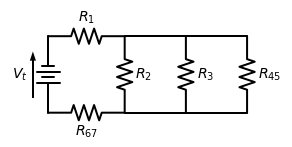

In [8]:
d = schem.Drawing(unit=2.5)
R67 = d.add(e.RES, d='right', botlabel='$R_{67}$')
d.add(e.LINE, d='right', l=2)
d.add(e.LINE, d='right', l=2)
R45 = d.add(e.RES, d='up', botlabel='$R_{45}$')
d.add(e.LINE, d='left', l=2)
d.push()
R3 = d.add(e.RES, d='down', toy=R67.end, botlabel='$R_3$')
d.pop()
d.add(e.LINE, d='left', l=2)
d.push()
R2 = d.add(e.RES, d='down', toy=R67.end, botlabel='$R_2$')
d.pop()
R1 = d.add(e.RES, d='left', tox=R67.start, label='$R_1$')
Vt = d.add(e.BATTERY, d='up', xy=R67.start, toy=R1.end, label='$V_t$', lblofst=0.3)
d.labelI(Vt, arrowlen=1.5, arrowofst=0.5)
d

Next we can combine the resistors in parallel. The resistors in parallel are $R_2$, $R_3$ and $R_{45}$. For a resistors in a simple parallel circuit:

$$ \frac{1}{R_t} = \frac{1}{R_1} + \frac{1}{R_2} + \frac{1}{R_3} ... + \frac{1}{R_n} $$
Since $R_2$, $R_3$ and $R_{45}$ are in parallel:

$$ \frac{1}{R_{2345}} = \frac{1}{R_2} + \frac{1}{R_3} + \frac{1}{R_{45}} $$$$ R_{2345} = \frac{1}{\frac{1}{R_2} + \frac{1}{R_3} + \frac{1}{R_{45}}} $$

In [9]:
def f(R_2, R_3, R_45):
    display(((1/R_2)+(1/R_3)+(1/R_45))**(-1))
    return ((1/R_2)+(1/R_3)+(1/R_45))**(-1)

w3 = interactive(f, R_2=10, R_3=10, R_45=10)
display(w3)

interactive(children=(IntSlider(value=10, description='R_2', max=30, min=-10), IntSlider(value=10, description…

In [10]:
button = widgets.Button(description="Run Result.",
                       value=True,
                       disabled=False,
                       button_style='success',
                       tooltip='good')
output = widgets.Output()
R_2345 = w3.result

display(button, output)

def on_button_clicked(b):
    with output:
        print("R_2345 =", R_2345, "Ω")

button.on_click(on_button_clicked)

Button(button_style='success', description='Run Result.', style=ButtonStyle(), tooltip='good')

Output()

Constructing a new SchemDraw diagram of the simplified the circuit. In this diagram, we'll combine $R_2$, $R_3$ and $R_{45}$ into one big resistor, $R_{2345}$.

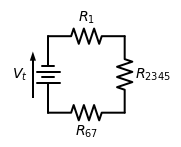

In [11]:
d = schem.Drawing(unit=2.5)
R67 = d.add(e.RES, d='right', botlabel='$R_{67}$')
R345 = d.add(e.RES, d='up' , botlabel='$R_{2345}$')
R1 = d.add(e.RES, d='left', tox=R67.start, label='$R_1$')
Vt = d.add(e.BATTERY, d='up', xy=R67.start, toy=R1.end, label='$V_t$', lblofst=0.3)
d.labelI(Vt, arrowlen=1.5, arrowofst=0.5)
d

Find $R_t$
To find $R_t$, we again combine the resistors in series. The remaining resistors $R_1$, $R_{2345}$ and $R_{67}$ are in series:

$$ R_{1234567} = R_1 + R_{2345} + R_{67} $$
We'll call the total resistance of the circuit $R_t$ which is equal to $R_{1234567}$

$$ R_t = R_{1234567} $$
Another calculation in Python.

In [12]:
def f(R_1, R_2345, R_67):
    display(R_1 + R_2345 + R_67)
    return R_1 + R_2345 + R_67

w4 = interactive(f, R_1=10, R_2345=10, R_67=10)
display(w4)

interactive(children=(IntSlider(value=10, description='R_1', max=30, min=-10), IntSlider(value=10, description…

In [13]:
button = widgets.Button(description="Run Result.",
                       value=True,
                       disabled=False,
                       button_style='success',
                       tooltip='good')
output = widgets.Output()
R_t = w4.result

display(button, output)

def on_button_clicked(b):
    with output:
        print("R_t =", R_t, "Ω")

button.on_click(on_button_clicked)

Button(button_style='success', description='Run Result.', style=ButtonStyle(), tooltip='good')

Output()

<h1>Find $I_t$</h1>
Find $V_6$ and $V_7$
Now that we've solved for the total resistance of the circuit $R_t$, we can find the total current running through the circuit using Ohm's Law $V = IR $.

$$ V = IR $$$$ I = \frac{V}{R} $$$$ I_t = \frac{V_t}{R_t} $$

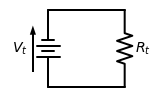

In [14]:
d = schem.Drawing(unit=2.5)
L2 = d.add(e.LINE, d='right')
Rt = d.add(e.RES, d='up' , botlabel='$R_{t}$')
L1 = d.add(e.LINE, d='left', tox=L2.start)
Vt = d.add(e.BATTERY, d='up', xy=L2.start, toy=L1.end, label='$V_t$', lblofst=0.3)
d.labelI(Vt, arrowlen=1.5, arrowofst=0.5)
d

In [15]:
def f(V_t, R_t):
    display(V_t / R_t)
    return V_t / R_t

w5 = interactive(f, V_t=10.00, R_t=10.00)
display(w5)

interactive(children=(FloatSlider(value=10.0, description='V_t', max=30.0, min=-10.0), FloatSlider(value=10.0,…

In [16]:

button = widgets.Button(description="Run Result.",
                       value=True,
                       disabled=False,
                       button_style='success',
                       tooltip='good')
output = widgets.Output()
I_t = w5.result

display(button, output)

def on_button_clicked(b):
    with output:
        print("I_t =", I_t, "A")

button.on_click(on_button_clicked)

Button(button_style='success', description='Run Result.', style=ButtonStyle(), tooltip='good')

Output()

The total current of the circuit, $I_t$ is the same as the current running through resistor $R_6$ and resistor $R_7$.

$$ I_t = I_6 = I_7 $$
We can apply Ohm's law to find $V_6$ now that we have $I_6$ and $I_7$.

$$ V_6 = I_6 R_6 $$$$ V_7 = I_7 R_7 $$

In [17]:
def f(I_6, R_6):
    display(I_6 * R_6)
    return I_6 * R_6

w6 = interactive(f, I_6=10.00, R_6=10.00)
display(w6)

interactive(children=(FloatSlider(value=10.0, description='I_6', max=30.0, min=-10.0), FloatSlider(value=10.0,…

In [18]:
button = widgets.Button(description="Run Result.",
                       value=True,
                       disabled=False,
                       button_style='success',
                       tooltip='good')
output = widgets.Output()
V_6 = w6.result

display(button, output)

def on_button_clicked(b):
    with output:
        print("V_6 =", V_6, "V")

button.on_click(on_button_clicked)

Button(button_style='success', description='Run Result.', style=ButtonStyle(), tooltip='good')

Output()

In [19]:
def f(I_7, R_7):
    display(I_7 * R_7)
    return I_7 * R_7

w7 = interactive(f, I_7=10.00, R_7=10.00)
display(w7)

interactive(children=(FloatSlider(value=10.0, description='I_7', max=30.0, min=-10.0), FloatSlider(value=10.0,…

In [20]:
button = widgets.Button(description="Run Result.",
                       value=True,
                       disabled=False,
                       button_style='success',
                       tooltip='good')
output = widgets.Output()
V_7 = w7.result

display(button, output)

def on_button_clicked(b):
    with output:
        print("V_7 =", V_7, "V")

button.on_click(on_button_clicked)

Button(button_style='success', description='Run Result.', style=ButtonStyle(), tooltip='good')

Output()

Find $I_3$ and $I_6$
The total current of the circuit, $I_t$ is the same as the current running through resistor $R_{2345}$.

$$ I_t = I_{2345} $$
We can apply Ohm's law to find $V_{2345}$ now that we have $I_{2345}$.

$$ V_{2345} = I_{2345} R_{2345} $$